# Examples of use

Imports:

In [1]:
from graph_utilities import GraphUtilities
import pandas as pd

c:\Users\Camilo\anaconda3\envs\fa2-test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Example 1: calculating ForceAtlas2 node positions from Wasserstein distance and exponential adjacency matrix

First we load a dataset, filtering by the ones with band gap larger than zero:

In [2]:
band_gaps_route = "datasets/band_gaps.csv"
bandgaps = pd.read_csv(band_gaps_route, index_col=0)
bandgaps_dict = bandgaps.to_dict()["band_gap"]

csv_route = "datasets/total_dos_01_eV.csv"
dataset = pd.read_csv(csv_route, header=None, index_col=0).T
dataset = dataset[[material for material in bandgaps_dict if bandgaps_dict[material] > 0 and material in dataset.columns.values]]
dataset

,mp-1025629,mp-1026909,mp-1027145,mp-1028589,mp-1030165,mp-10694,mp-1080045,mp-1084770,mp-1096986,mp-1102988,...,mp-705411,mp-706271,mp-706504,mp-743614,mp-743839,mp-744081,mp-744322,mp-744639,mp-744674,mp-745180
1,0.000000,0.000000,0.000000,0.0,0.0,0.510102,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.255426,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.308764,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,2.261018,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.078909,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.228983,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,4.995873,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.003481,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,6.328385,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.0,5.858243,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072914,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,3.755067,2.981640,3.430314,0.0,0.0,1.472266,3.518559,4.729347,0.590617,1.359048,...,0.326455,5.810713,1.528454,0.440319,0.615700,4.862973e+00,2.896012,4.781760,6.389512,4.232583
253,3.722319,2.884611,3.244909,0.0,0.0,1.446489,3.026318,4.531668,0.559921,1.664009,...,0.252909,5.388882,1.343314,0.677360,0.664960,1.145014e+00,2.898581,4.141591,7.244699,4.107342
254,3.925979,2.774550,2.862137,0.0,0.0,1.371652,2.399553,4.893958,0.520801,1.750445,...,0.101578,3.681753,1.490077,1.132283,0.715728,1.030076e-01,2.774274,3.069503,7.112189,3.973130
255,4.272192,2.670354,2.480689,0.0,0.0,1.260601,2.327631,4.961529,0.504004,1.513416,...,0.183532,5.545403,1.687521,1.652804,0.759190,2.697483e-03,2.354096,2.466896,6.241405,3.583664


Instanciating the class:

In [3]:
graph_utils = GraphUtilities(materials_df=dataset, band_gaps_route=band_gaps_route)

Calculating normalisation, cumulative distribution and distance matrix:

In [4]:
graph_utils.calculate_normalisation_and_cumul()
graph_utils.calculate_diff_matrix()
graph_utils.get_diff_matrix()

Calculating normalisation and cumulative distribution...
Calculating difference matrix...


100%|██████████| 11421/11421 [04:29<00:00, 42.34it/s] 


,mp-1025629,mp-1026909,mp-1027145,mp-1028589,mp-1030165,mp-10694,mp-1080045,mp-1084770,mp-1096986,mp-1102988,...,mp-705411,mp-706271,mp-706504,mp-743614,mp-743839,mp-744081,mp-744322,mp-744639,mp-744674,mp-745180
0,,,,,,,,,,,,,,,,,,,,,
mp-1025629,0.000000,11.564963,9.942252,46.361040,33.827645,23.490389,38.742733,36.268377,34.274274,35.524479,...,33.375653,31.903979,23.729382,26.810536,29.290251,49.907108,37.000571,31.528272,15.804617,21.463396
mp-1026909,11.564963,0.000000,1.625905,34.799597,22.262682,25.733159,33.395260,31.623135,26.653749,28.431587,...,24.092138,23.136130,14.865522,15.296725,18.599774,44.136366,25.441996,19.963309,9.691179,19.000580
mp-1027145,9.942252,1.625905,0.000000,36.420479,23.885393,24.931784,34.032444,32.229907,27.529143,29.836279,...,25.170148,23.998620,16.068397,16.868284,19.637037,44.910743,27.058319,21.586021,10.414668,19.566152
mp-1028589,46.361040,34.799597,36.420479,0.000000,15.380020,51.081671,23.104653,22.113616,27.488028,29.576055,...,28.179058,23.556714,32.919511,29.574272,32.357062,23.427519,23.734413,29.114920,32.942935,28.117485
mp-1030165,33.827645,22.262682,23.885393,15.380020,0.000000,38.241899,27.163354,24.711449,21.416750,27.604193,...,17.485452,18.166524,21.000199,18.044122,21.798381,33.299624,15.401952,17.458460,21.700053,21.085848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-744081,49.907108,44.136366,44.910743,23.427519,33.299624,42.301210,19.509289,21.902350,30.861960,40.770676,...,25.852685,29.121287,32.357268,36.549891,43.564181,0.000000,29.113932,34.979781,38.372920,32.314903
mp-744322,37.000571,25.441996,27.058319,23.734413,15.401952,33.911279,24.646057,27.040326,17.451251,23.136316,...,12.796379,16.028735,14.197248,12.675190,18.235060,29.113932,0.000000,9.469171,22.521005,21.706034
mp-744639,31.528272,19.963309,21.586021,29.114920,17.458460,27.323517,31.605845,33.766695,21.134951,25.419330,...,16.176503,18.366016,12.194667,6.732185,10.154649,34.979781,9.469171,0.000000,17.586745,24.247203


Calculating adjacency matrix and applying a mask that keeps the top two weights per material:

In [5]:
graph_utils.calculate_adj_matrix(method="exponential", a_exponential=1, b_exponential=30)
graph_utils.apply_mask_to_adj_matrix(method="keep_weights_per_material", keep_weights_per_material=2)
graph_utils.get_adj_matrix()

Caculating adjacency matrix...
Applying mask to adjacency matrix...


100%|██████████| 11422/11422 [01:38<00:00, 115.89it/s]


,mp-1025629,mp-1026909,mp-1027145,mp-1028589,mp-1030165,mp-10694,mp-1080045,mp-1084770,mp-1096986,mp-1102988,...,mp-705411,mp-706271,mp-706504,mp-743614,mp-743839,mp-744081,mp-744322,mp-744639,mp-744674,mp-745180
0,,,,,,,,,,,,,,,,,,,,,
mp-1025629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-1026909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-1027145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-1028589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-1030165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-744081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-744322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mp-744639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you can see, most of the elements of the matrix are zero which makes sense because it kept the two top values in each column. But not all are zero.

Calculating the ForceAtlas2 node positions with the default parameters:

In [6]:
graph_utils.calculate_fa2_node_positions()

Calculating node positions...


100%|██████████| 2000/2000 [20:01<00:00,  1.66it/s]

BarnesHut Approximation  took  226.25  seconds
Repulsion forces  took  947.71  seconds
Gravitational forces  took  3.41  seconds
Attraction forces  took  0.89  seconds
AdjustSpeedAndApplyForces step  took  11.70  seconds


Visualizing the resulting graph with some specific parameters, and also giving emphasis to some materials:

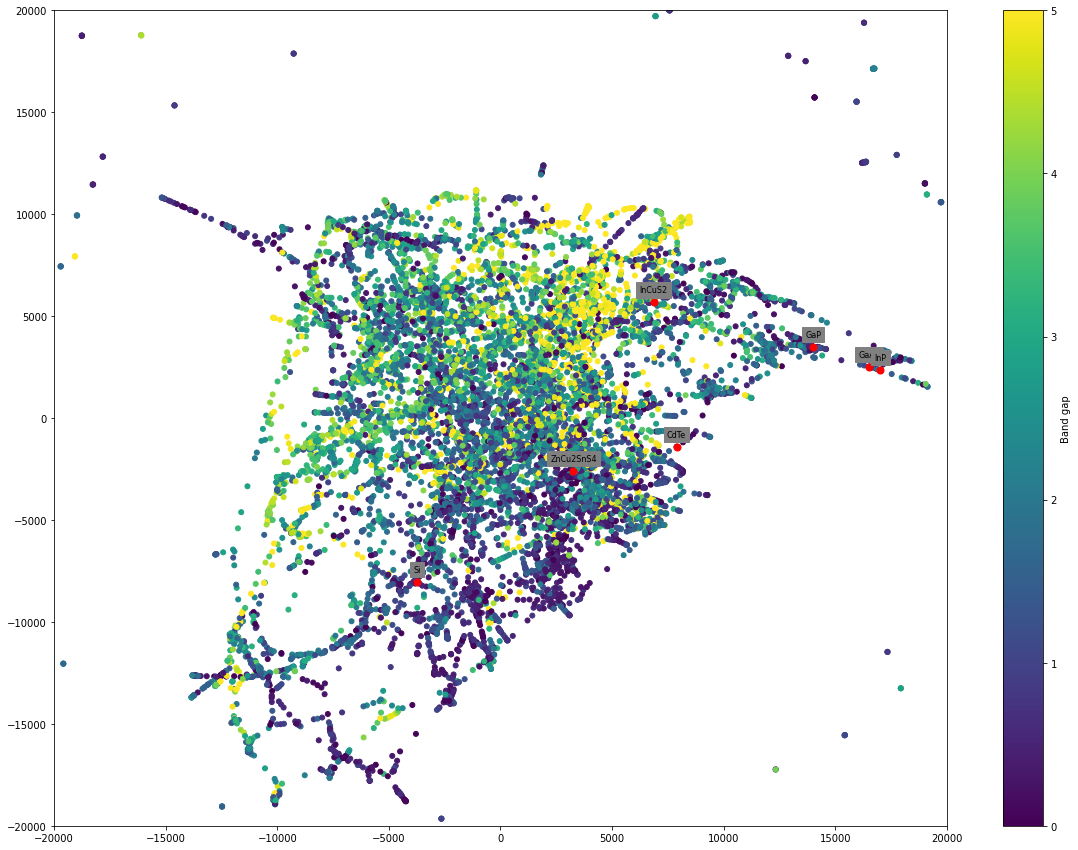

In [7]:
graph_utils.draw_network_matplotlib(
    show_bandgaps=True, colorbar_lims=(0, 5), x_limits=(-20000,20000), y_limits=(-20000,20000),
    materials_emphasis=["mp-2534", "mp-149", "mp-406", "mp-20351", "mp-2490", "mp-22736", "mp-1079541"], show_axis=True
)

It is also possible to save everything into files to load it later (note, the saved files in the folder don't correspond to this example):

In [8]:
graph_utils.save_diff_matrix_file("saved_files/test_diff_save.csv")
graph_utils.save_adj_matrix_file("saved_files/test_adj_save.csv")
graph_utils.save_node_positions_file("saved_files/test_node_positions_save.json")

Saving difference matrix to a CSV...
Difference matrix saved successfully to a CSV.
Saving adjacency matrix to a CSV...
Adjacency matrix saved successfully to a CSV.
Saving node positions to a JSON...
Node positions successfully saved to a JSON.


### Example 2: calculating UMAP node positions using three channel Gaussian normalisation, and Wasserstein distance

First we load the dataset again, but this time a different dataset where the materials are vectors composed of three different concatenated vectors of same length (three channels), where each channel represents the density of states of the orbital (s, p, d). Also, here the dataset is filtered with values that have band gap larger than zero and energy above hull lesser than 0.02:

In [9]:
band_gaps_route = "datasets/band_gaps.csv"
bandgaps = pd.read_csv(band_gaps_route, index_col=0)
bandgaps_dict = bandgaps.to_dict()["band_gap"]

ehulls_route = "datasets/ehull.csv"
ehulls = pd.read_csv(ehulls_route, index_col=0)
ehulls_dict = ehulls.to_dict()["ehull"]

csv_route = "datasets/spd_dos_01_eV_clipped.csv"
dataset = pd.read_csv(csv_route, header=None, index_col=0).T

dataset = dataset[[
    material for material in bandgaps_dict if 
    bandgaps_dict[material] > 0 and
    material in dataset.columns.values and
    material in ehulls_dict and 
    ehulls_dict[material] < 0.02
]]
dataset

,mp-1025629,mp-10694,mp-1080045,mp-1084770,mp-1027335,mp-10474,mp-10601,mp-11025,mp-1188095,mp-1189200,...,mp-1179734,mp-1180046,mp-1180659,mp-1181188,mp-1181189,mp-1182086,mp-1182477,mp-1190406,mp-1193746,mp-1205574
1,0.000000,0.499651,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.022023,0.000000,0.000000,0.0,0.0,0.960488,7.192636e+00,0.000000,0.000000,0.000000
2,0.000000,2.205585,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133387,0.000000,0.000000,0.0,0.0,0.016249,1.195703e+00,0.000000,0.000000,0.000000
3,0.000000,4.832956,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.226060,0.000000,0.000000,0.0,0.0,0.000000,5.214067e-02,0.000000,0.000000,0.000000
4,0.000000,6.054731,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.102815,0.000000,0.000000,0.0,0.0,0.015839,0.000000e+00,0.000000,0.000000,0.031268
5,0.000000,5.522536,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.014707,0.000000,0.000000,0.0,0.0,0.636671,0.000000e+00,0.000000,0.000000,0.679401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2.292297,1.131938,2.401542,3.477690,0.740047,0.0,1.507654,0.352126,0.860283,1.375280,...,0.036689,0.183429,3.312491,0.0,0.0,0.000000,0.000000e+00,0.192929,0.000443,2.856712
765,2.279280,1.102793,2.023467,3.260534,0.919474,0.0,1.499369,0.292926,0.881796,1.410077,...,0.052371,0.181670,2.953858,0.0,0.0,0.000000,0.000000e+00,0.010683,0.000045,3.002938
766,2.409464,1.034956,1.530774,3.493667,0.850213,0.0,1.377409,0.250316,0.905890,1.483626,...,0.104446,0.174380,2.858018,0.0,0.0,0.000000,1.716526e-09,0.000160,0.000001,3.434530
767,2.616597,0.937431,1.430786,3.545133,0.699239,0.0,1.100760,0.173231,0.855762,1.661713,...,0.168000,0.156017,2.608934,0.0,0.0,0.000000,1.047252e-06,0.000000,0.000000,4.353553


The class is instanciated:

In [10]:
graph_utils = GraphUtilities(
    materials_df=dataset, band_gaps_route="../Data/band_gaps.csv",
    es_above_hull_route="../Data/ehull.csv"
)

To calculate UMAP node positions, it's not necessary to calculate a difference nor an adjacency matrix. Just the normalisation is enough. For the normalisation we'll use three_gaussian_multiply, which just multiplies each channel by a Gaussian to smooth out the edges and give more importance to the center of the Gaussian for distance calculations (a little to the right of the center actually):

In [11]:
graph_utils.calculate_normalisation_and_cumul("triple_gaussian_multiply")

Calculating normalisation and cumulative distribution...


Calculating the node positions with UMAP:

In [12]:
graph_utils.calculate_umap_node_positions()

Calculating node positions...


And finally graphing them with plotly with emphasis in one material (look at the red dot):

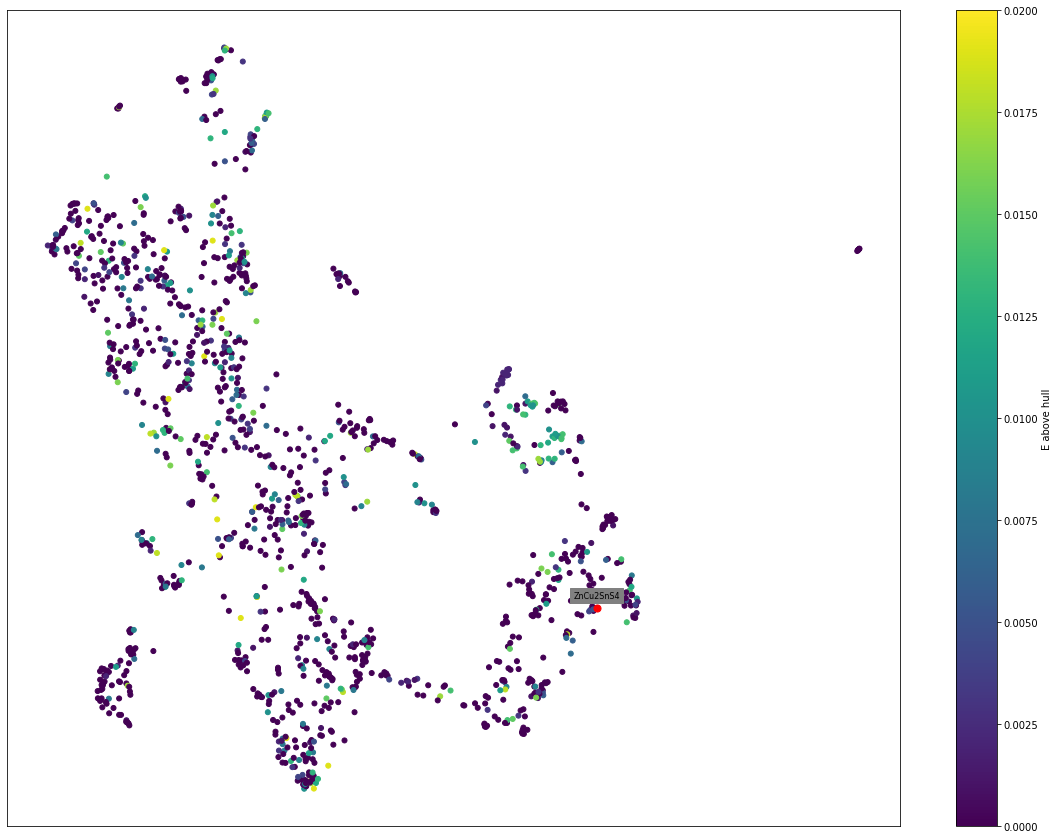

In [14]:
graph_utils.draw_network_matplotlib(show_es_above_hull=True, colorbar_lims=(0, 0.02), materials_emphasis=["mp-1079541"])

Graphing with Plotly is also available:

In [ ]:
graph_utils.draw_network_plotly(show_es_above_hull=True, colorbar_lims=(0, 0.02), materials_emphasis=["mp-1079541"])

After this it is possible to get the materials closest to a specific material, for instance ZnCu₂SnS₄ represented with "mp-1079541":

In [15]:
closest_materials = graph_utils.get_closest_materials_to("mp-1079541", 5, just_names=True)
closest_materials

['mp-1078292', 'mp-1025467', 'mp-1078918', 'mp-10967', 'mp-10952']

And we can plot the vectors to analyse them in depth:

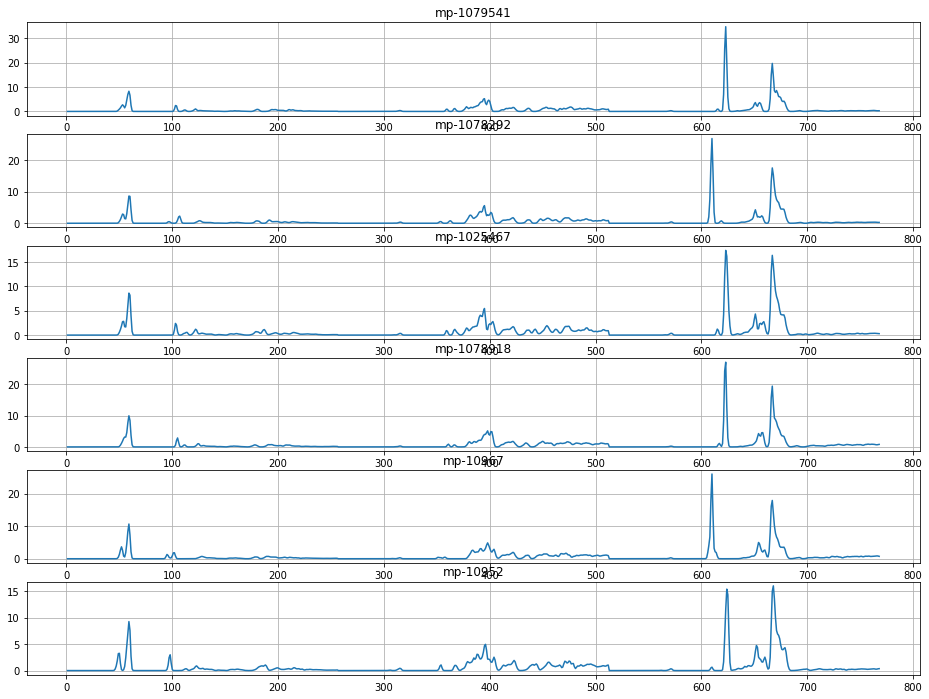

In [16]:
graph_utils.draw_sample_materials(sample_materials_names=["mp-1079541"]+closest_materials)